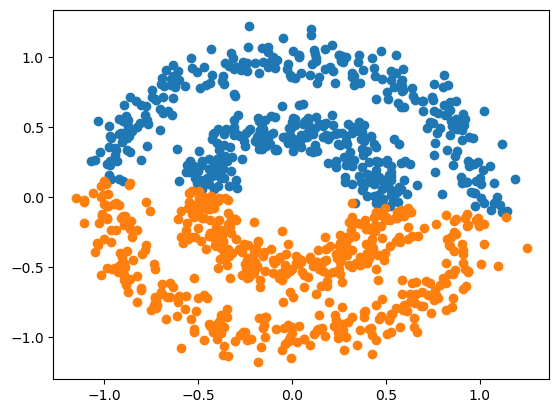

In [1]:
#kmeans의 단점 : 군집의 모양에 따라 잘 작동하지 않을 수 있음, 군집 개수를 직접 지정해야 함
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np
np.random.seed(2)
#factor : 내부 원과 외부 원 사이의 비율
X1, y1 = make_circles(n_samples=1000, factor=.5, noise=.09)
model = KMeans(n_clusters=2,random_state=10)
model.fit(X1)
plt.scatter(X1[model.labels_ == 0, 0], X1[model.labels_ == 0, 1])
plt.scatter(X1[model.labels_ == 1, 0], X1[model.labels_ == 1, 1])

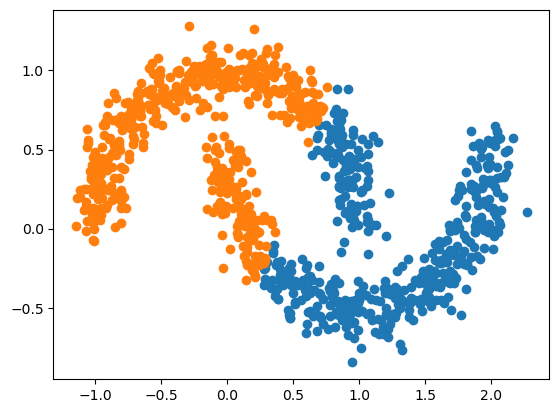

In [2]:
from sklearn.datasets import make_moons
X2, y2 = make_moons(n_samples=1000, noise=.1)
model = KMeans(n_clusters=2,random_state=10)
model.fit(X2)
plt.scatter(X2[model.labels_ == 0, 0], X2[model.labels_ == 0,1])
plt.scatter(X2[model.labels_ == 1, 0], X2[model.labels_ == 1,1])

In [3]:
# DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 군집화
# 데이터의 밀도에 기반한 군집화
# 포인트가 많이 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식
# 어떤 포인트를 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
# 군집의 갯수를 사용자가 지정할 필요가 없음
# 최소거리(이웃을 정의하기 위한 거리), 최소 데이터 갯수(밀집지역을 정의하기 위해 필요한 이웃의 갯수)

DBSCAN(eps=3, min_samples=2)
[ 0  0  0  1  1  2  2 -1]


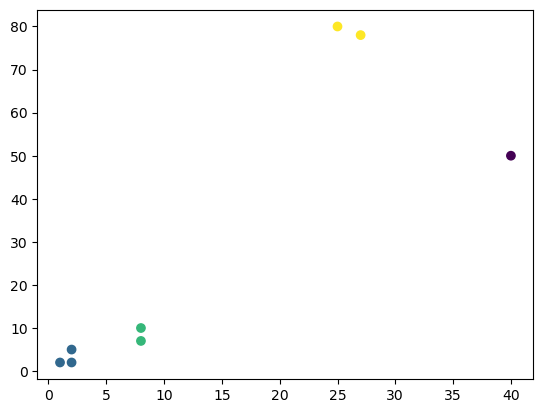

In [4]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 5],
[8, 7], [8, 10], [25, 80], [27,78], [40,50]])
#최소거리 3, 최소샘플갯수 2개
# eps(epsilon) : 이웃을 정의하기 위한 거리, 기본값 0.5
# min_samples : 핵심데이터를 정의하기 위해 필요한 이웃영역 안의 데이터 갯수, 기본값 5
model = DBSCAN(eps=3, min_samples=2).fit(X)
print(model)
plt.scatter(X[:,0],X[:,1],c=model.labels_)
print(model.labels_) #3개로 나눠짐(-1은 노이즈가 있는 데이터, 아웃라이어)

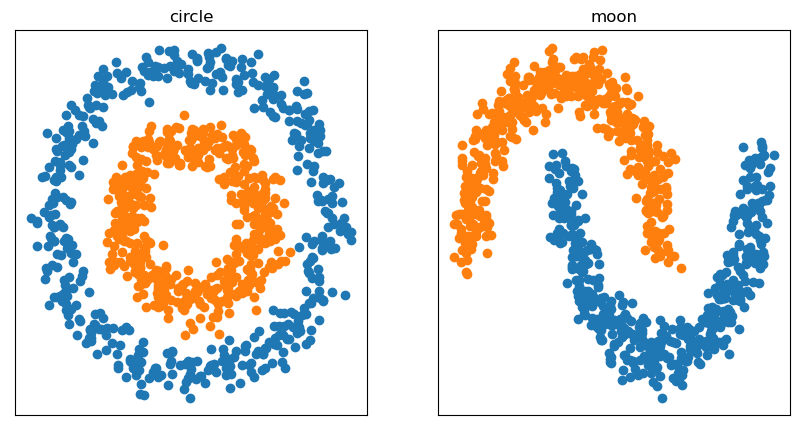

In [5]:
def plot_DBSCAN(title, X, eps):
    model = DBSCAN(eps=eps, min_samples=5)
    model.fit_predict(X)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1])
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1])
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_DBSCAN("circle", X1, 0.1)
plt.subplot(122)
plot_DBSCAN("moon", X2, 0.1)

In [6]:
import pandas as pd
df=pd.read_csv('c:/data/iris/iris.csv')
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [7]:
cols=df.columns[:-2]
X=df[cols]
y=df['Species']

In [12]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
# model = DBSCAN(eps=0.5,min_samples=5)
model = DBSCAN(eps=1,min_samples=3)
pipeline = make_pipeline(scaler,model)
pred = pd.DataFrame(pipeline.fit_predict(X))
pred.columns=['predict']
result = pd.concat([X,y,pred],axis=1)
result

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [13]:
# 노이즈가 있는 샘플들은 -1로 처리됨
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

Text(0.5, 1.0, 'clustering')

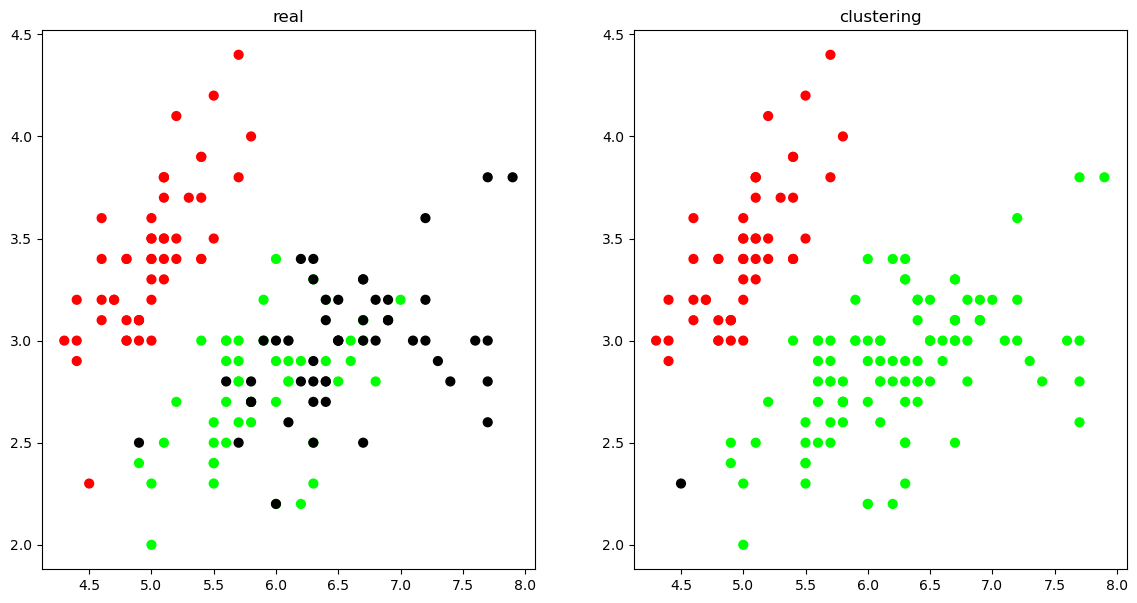

In [14]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(result['SepalLength'], result['SepalWidth'], c=colormap[y], s=40)
plt.title('real')
# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(result['SepalLength'], result['SepalWidth'], c=colormap[model.labels_], s=40)
plt.title('clustering')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13328\213926438.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)


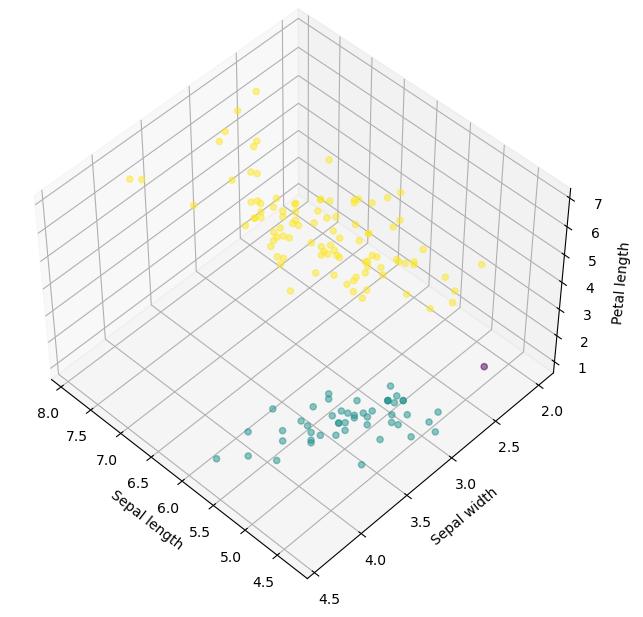

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))
# rect : 축의 위치 left, bottom, width, height
# elev 고도보기 각도(기본값 30), azim 방위각(기본값 -60)
ax=Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
ax.scatter(result['SepalLength'],result['SepalWidth'],result['PetalLength'],c=result['predict'],alpha=0.5)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()